In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')

In [3]:
df = pd.read_csv("AIML Dataset.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [9]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [11]:
df['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [13]:
df.isnull().sum().sum()

0

In [16]:
df.shape[0]

6362620

# Our fraud data Percentage

In [19]:
round(df['isFraud'].value_counts()[1] / df.shape[0] * 100,2)

0.13

# Analyzing

Text(0, 0.5, 'Count')

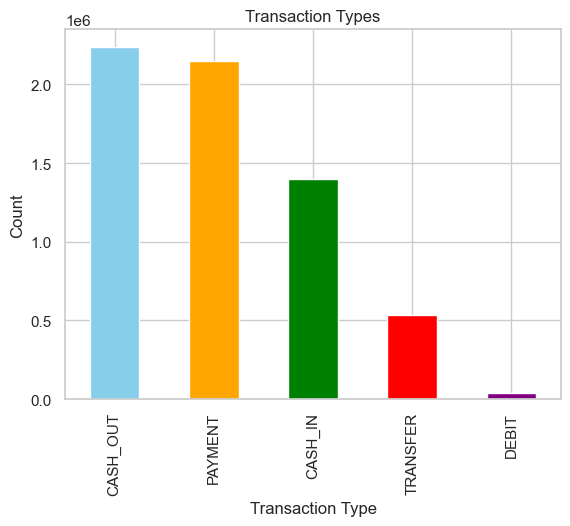

In [21]:
df['type'].value_counts().plot(kind='bar', title='Transaction Types', color=['skyblue', 'orange', 'green', 'red', 'purple'])
plt.xlabel('Transaction Type')
plt.ylabel('Count')

Text(0, 0.5, 'Fraud Rate')

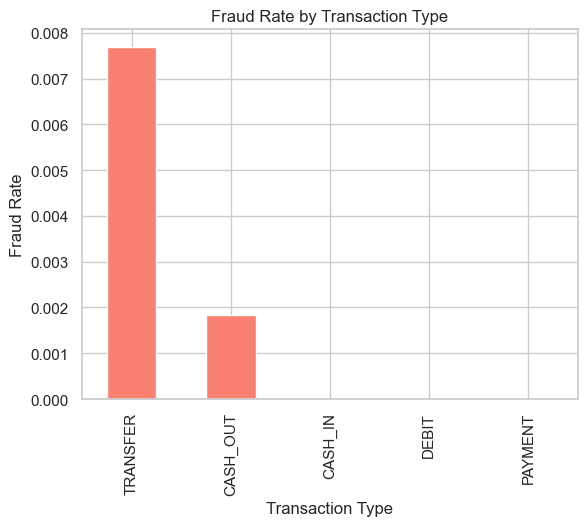

In [22]:
fraud_by_type = df.groupby('type')['isFraud'].mean().sort_values(ascending=False)
fraud_by_type.plot(kind='bar', title='Fraud Rate by Transaction Type', color='salmon')
plt.xlabel('Transaction Type')
plt.ylabel('Fraud Rate')

In [24]:
df['amount'].describe().astype(np.int64)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int64

# Tranforming logaritmik data
So, instead of using np.log(x) I'm using np.log1p(x). But why?

np.log(x) --> log(1+x)

So, it's more safety to used on data that maybe is not cleaned yet or half-cleaned. Because if we're using np.log(x) we will got error if the value is 0.

Text(0.5, 0, 'Log(Amount + 1)')

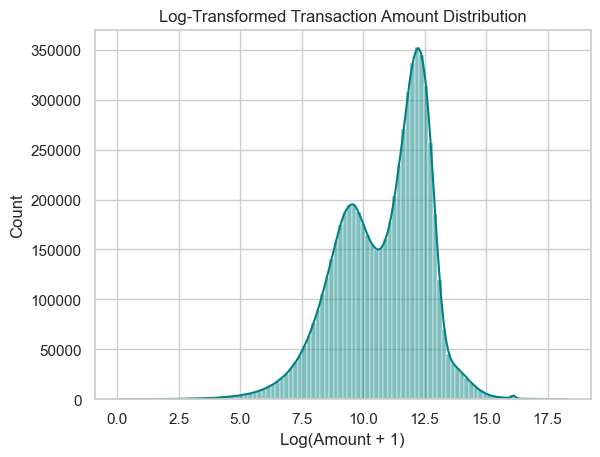

In [25]:
sns.histplot(np.log1p(df['amount']), bins=100, kde=True, color='teal')
plt.title('Log-Transformed Transaction Amount Distribution')
plt.xlabel('Log(Amount + 1)')

# Relation between Fraud and Amount

Text(0, 0.5, 'Amount')

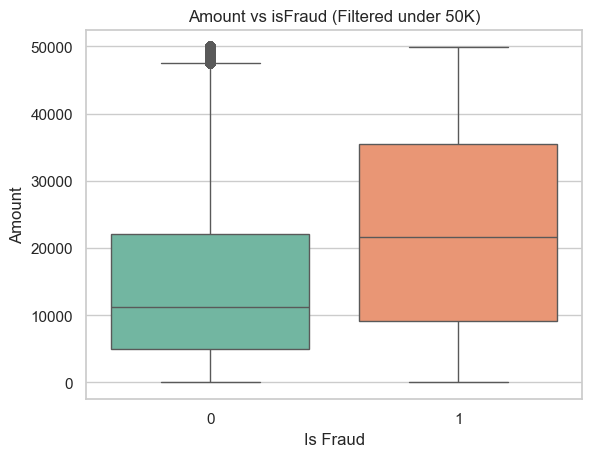

In [26]:
sns.boxplot(data= df[df['amount'] < 50000], x = 'isFraud', y = 'amount', palette = 'Set2')
plt.title('Amount vs isFraud (Filtered under 50K)')
plt.xlabel('Is Fraud')
plt.ylabel('Amount')

# Balance chains
to see if we have any negative balances

In [29]:
df['balanceDiffOrig'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['balanceDiffDest'] = df['newbalanceOrig'] - df['oldbalanceDest']

In [31]:
(df['balanceDiffOrig']  < 0).sum()

1399253

In [32]:

(df['balanceDiffDest']  < 0).sum()

2797585

In [33]:
df.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,160296.36
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,19384.72


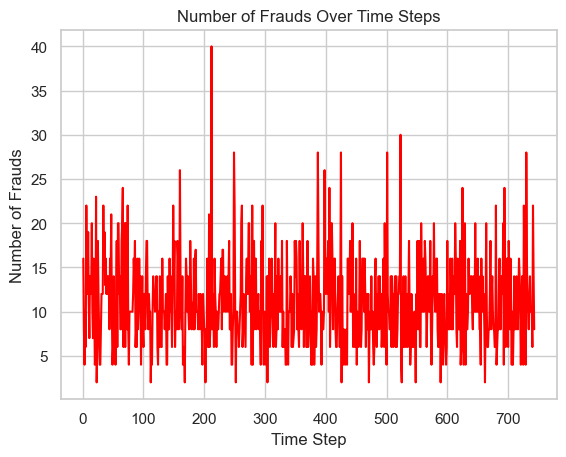

In [39]:
frauds_per_step = df[df['isFraud'] ==1]['step'].value_counts().sort_index()
plt.plot(frauds_per_step.index, frauds_per_step.values, color='red')
plt.title('Number of Frauds Over Time Steps')
plt.xlabel('Time Step')
plt.ylabel('Number of Frauds')
plt.grid(True)

In [40]:
df.drop(columns='step', inplace=True)

In [41]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,160296.36
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,19384.72
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.00
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.00
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,29885.86


In [45]:
top_senders = df['nameOrig'].value_counts().head(10)

In [46]:
top_senders

nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
C1677795071    3
C1462946854    3
C1999539787    3
C2098525306    3
C400299098     3
Name: count, dtype: int64

In [47]:
top_recivers = df['nameDest'].value_counts().head(10)

In [48]:
top_recivers

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C451111351      99
C1789550256     99
C1360767589     98
C1023714065     97
Name: count, dtype: int64

In [51]:
fraud_users = df[df['isFraud'] == 1]['nameOrig'].value_counts().head(10)

In [52]:
fraud_users

nameOrig
C1305486145    1
C755286039     1
C973279667     1
C258213312     1
C1640703547    1
C1127265876    1
C317779855     1
C1064034527    1
C1141104763    1
C1966863341    1
Name: count, dtype: int64

In [53]:
fraud_types = df[df['type'].isin(['TRANSFER', 'CASH_OUT'])]

In [54]:
fraud_types['type'].value_counts()

type
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64

Text(0, 0.5, 'Count')

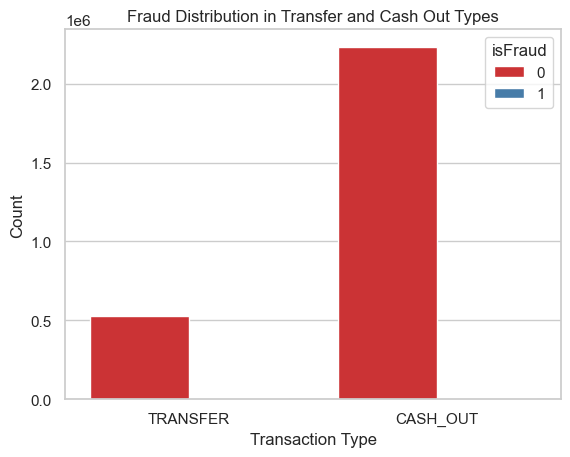

In [57]:
sns.countplot(data=fraud_types, x='type', hue='isFraud', palette='Set1')
plt.title('Fraud Distribution in Transfer and Cash Out Types')
plt.xlabel('Transaction Type')
plt.ylabel('Count')

# Finding Correlation

In [61]:
corr = df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud']].corr()

In [62]:
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

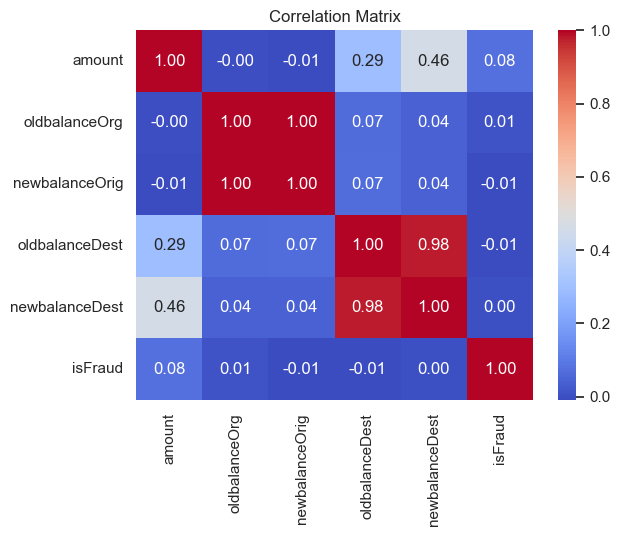

In [63]:
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')

In [65]:
zero_after_transfer = df[
    (df['oldbalanceOrg'] > 0) &
    (df['newbalanceOrig'] == 0) &
    (df['type'].isin(['TRANSFER', 'CASH_OUT'])) 
]

In [67]:
len(zero_after_transfer)

1188074

In [69]:
zero_after_transfer.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
2,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,181.0,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,181.0,-21182.0
15,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,15325.0,-5083.0
19,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,705.0,-22425.0
24,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,10835.0,-6267.0


In [70]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

# Feature Engineering

In [ ]:
from sklearn.model_selection import train_test_split    #for training and splitting
from sklearn.preprocessing import StandardScaler    #for scaling our data
from sklearn.linear_model import LogisticRegression     # for the modeling side
from sklearn.metrics import classification_report, confusion_matrix     # for model evaluation
from sklearn.pipeline import Pipeline   # for training the model and transformation
from sklearn.compose import ColumnTransformer   # for column transformations
from sklearn.preprocessing import OneHotEncoder 

In [72]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,160296.36
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,19384.72
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.00
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.00
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,29885.86


In [73]:
df_model = df.drop(columns=['nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1)

In [74]:
df_model.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64,160296.36
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28,19384.72
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,181.00,0.00
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,181.00,-21182.00
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,11668.14,29885.86


In [75]:
categorycal = ['type']
numeric = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

In [76]:
y = df_model['isFraud']
X = df_model.drop('isFraud', axis=1)


In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [80]:
preprocessor = ColumnTransformer(
    transformers= [
        ('num', StandardScaler(), numeric),
        ('cat', OneHotEncoder(), categorycal)
    ],
    remainder='drop'
)

In [83]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(class_weight='balanced', max_iter=1000))
])

In [84]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat', OneHotEncoder(),
                                                  ['type'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [86]:
y_pred = pipeline.predict(X_test)

In [88]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1906322
           1       0.02      0.94      0.04      2464

    accuracy                           0.95   1908786
   macro avg       0.51      0.94      0.51   1908786
weighted avg       1.00      0.95      0.97   1908786



In [89]:
confusion_matrix(y_test, y_pred)

array([[1804580,  101742],
       [    144,    2320]], dtype=int64)

In [93]:
pipeline.score(X_test, y_test) * 100

94.66226177266599

# Exporting the Pipeline

In [92]:
import joblib

joblib.dump(pipeline, 'fraud_detection_model.pkl')

['fraud_detection_model.pkl']